# Lab 03 - 1 #

## Principal Component Analysis ##

Implement a PCA classifier from scratch for digit classification on the MNIST datasets.
1. Load the data
2. Understand how many objects and features we have
    * Hint: We have a collection of images
3. Draw the first 20 digits of the training dataset
4. Describe each image with a flattened representation of its pixels, *i.e.*, a two-dimensional matrix with rows = objects, columns = w*h
    * Hint: https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.reshape.html
5. Calculate the mean of each feature and center the data
6. Calculate the covariance matrix of the centered data
7. Calculate eigenvalues and eigenvectors of the covariance matrix
8. Order the eigenvalues from largest to smallest
9. Construct the transformation matrix T
10. Apply the transformation to the train data, and make a scatter plot of the transformed data
11. Apply the transformation to the test data and try to train a Bayes classifier with prior = 0.5 for each class (lab2)
12. Build the model *from the train data*, finding the parameters of the Gaussian distributions of the two classes
13. For each test point, evaluate the likelihood and rank by assigning it to the class with the highest likelihood
14. Calculate the accuracy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

Nr Obj: 12665
Im width: 28
Im height: 28


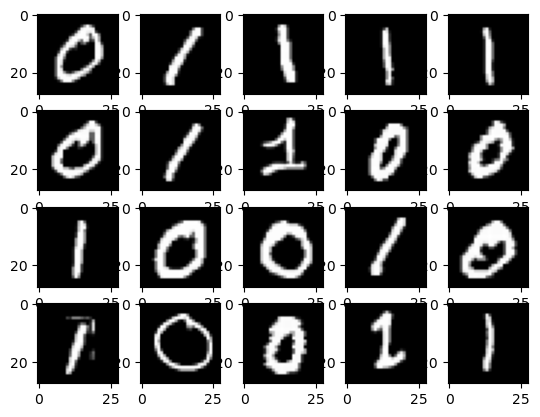

In [6]:
# TODO.
X_train = np.load('dataset1/train-images-01.npy')
Y_train = np.load('dataset1/train-labels-01.npy')

X_test = np.load('dataset1/test-images-01.npy')
Y_test = np.load('dataset1/test-labels-01.npy')

nobj = X_train.shape[0]
im_w = X_train.shape[1]
im_h = X_train.shape[2]

print("Nr Obj:", nobj)
print("Im width:", im_w)
print("Im height:", im_h)

rows = 4
cols = 5
fig = plt.figure()

ax = []
for i in range(rows*cols):
    ax.append(fig.add_subplot(rows,cols,i+1))
    plt.imshow(X_train[i], cmap='gray')
    
plt.show()

4. Describe each image with a flattened representation of its pixels, *i.e.*, a two-dimensional matrix with rows = objects, columns = w*h


In [9]:
X = np.reshape(X_train , (nobj,im_w*im_h))

5. Calculate the mean of each feature and center the data


In [12]:
mu = np.mean(X,axis=0)
Xc = X - mu

6. Calculate the covariance matrix of the centered data


In [13]:
C = np.cov(Xc,rowvar=False) # == np.cov(Xc.T)

7. Calculate eigenvalues and eigenvectors of the covariance matrix


In [14]:
lambdas, U = np.linalg.eigh(C)

8. Order the eigenvalues from largest to smallest


In [15]:
best_eig_idxs = np.argsort(lambdas)[::-1]
best_eig = lambdas[best_eig_idxs]   # 784
best_U = U[:,best_eig_idxs]

9. Construct the transformation matrix T


In [16]:
# By selecting the first two columns I can get the eigenvectors corresponding to the 2 largest eigenvalues.
T = best_U[:,:2]    #Reduce dim of data from 784 -> 2.

10. Apply the transformation to the train data, and make a scatter plot of the transformed data


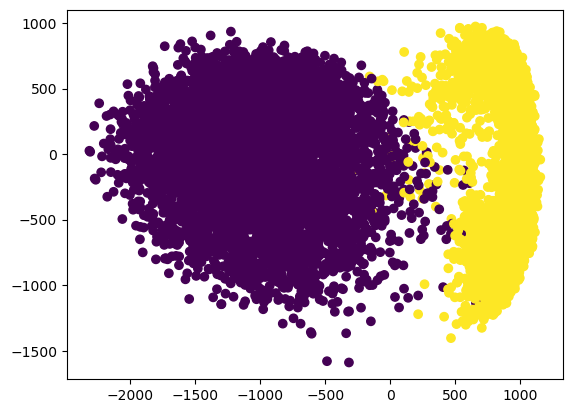

In [17]:
# The transformation is performed via the inner product of the transformation matrix T
# and the (centered) data matrix
XT = np.dot(Xc, T)
plt.scatter(XT[:,0], XT[:,1], c=Y_train)    # Reason 1 to use PCA.
plt.show()

11. Apply the transformation to the test data and try to train a Bayes classifier with prior = 0.5 for each class (lab2)


In [19]:
# 11.
nobj_test = X_test.shape[0]
Xx_test = np.reshape(X_test, (nobj_test, im_w*im_h))
Xc_test = Xx_test - mu
XT_test = np.dot(Xc_test, T)


12. Build the model *from the train data*, finding the parameters of the Gaussian distributions of the two classes


In [20]:
class1 = XT[Y_train == 0, :]
class2 = XT[Y_train == 1, :]

m1 = np.mean(class1, axis=0)
m2 = np.mean(class2, axis=0)
C1 = np.cov(class1, rowvar=False)
C2 = np.cov(class2, rowvar=False)


13. For each test point, evaluate the likelihood and rank by assigning it to the class with the highest likelihood


In [21]:
lik1 = multivariate_normal.pdf(XT_test, m1, C1)* 1/2
lik2 = multivariate_normal.pdf(XT_test, m2, C2)* 1/2
loglik = np.log(np.vstack((lik1, lik2)))
prediction = np.argmax(loglik, axis=0)

14. Calculate the accuracy


In [22]:
accuracy = np.sum(prediction == Y_test)/len(Y_test)
print('Classifier Accuracy: ' + "{0:.2f}".format(accuracy*100) + "%")

Classifier Accuracy: 99.62%


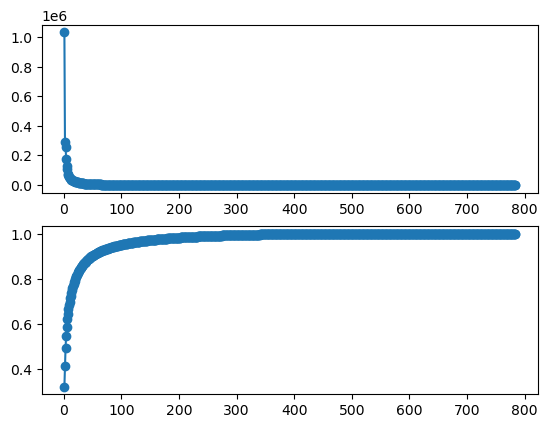

In [23]:
# How do you choose the right number of eigenvalues for my Transformation matrix?
D_ord = np.sort(lambdas)[::-1]
d = D_ord.shape[0]

fig, axs = plt.subplots(2)

# Plot 1
axs[0].plot(np.arange(1,d+1),D_ord)     # Lineplot.
axs[0].scatter(np.arange(1,d+1),D_ord)  # Accompany line with dots (scatter).

# Plot 2
y = np.cumsum(D_ord)/np.sum(D_ord)
axs[1].plot(np.arange(1,d+1),y)
axs[1].scatter(np.arange(1,d+1),y)

plt.show()

# How to select the optimal number? Keep 80% or more of the variance.
ratio = 0.8
N = len(np.where(y >= ratio)[0])